Primary Goal (from the Bank Marketing context):
# Predict whether a client will subscribe to a term deposit (the y variable).

In [1]:
# import libraries
import pandas as pd 
import os 

import matplotlib.pyplot as plt
import seaborn as sns

# 1. EDA

## 1.1 Data cleaning

In [2]:
# Load the dataset
Bank_raw_dataset = pd.read_csv('../data/raw/Bank_telemarketing_data.csv')

In [3]:
Bank_raw_dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [4]:
Bank_raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### From Above results,  
1. Dtype **Object** show's the column is of categorical data 
2. Dtype **int64** shows the column is of integer/numerical data type
3. There are total 20 columns in the dataset.
4. Total entries in dataset 41,188

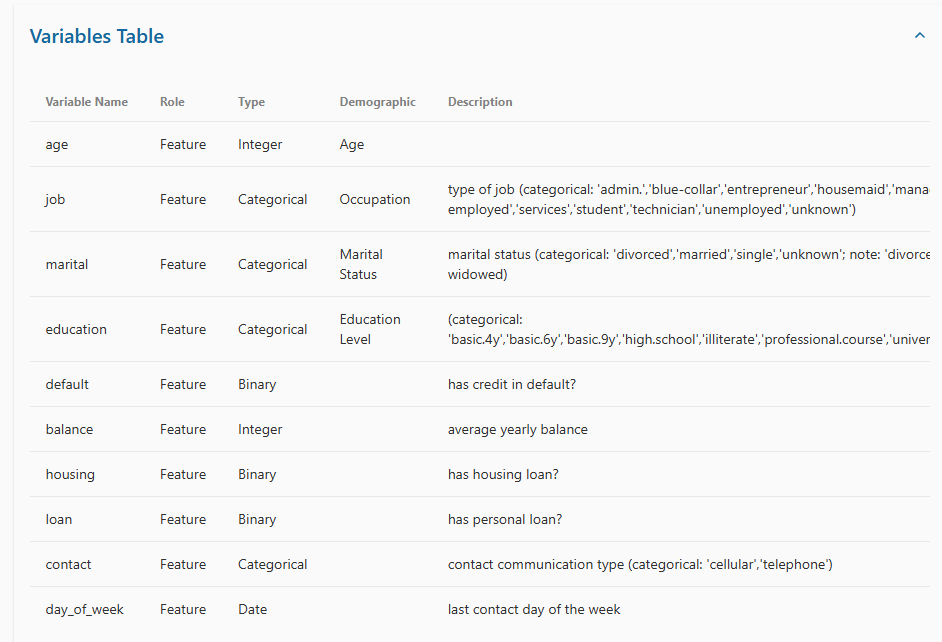

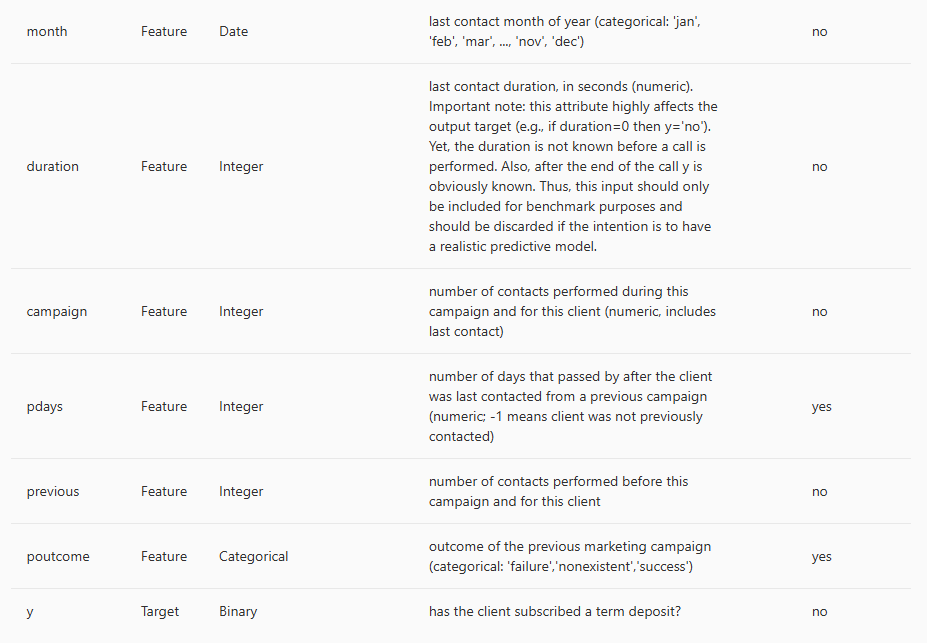

In [5]:
Bank_raw_dataset.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.019010
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.178074
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4964.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.000000


In [6]:
#check for missing values
Bank_raw_dataset.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
#check for duplicates, null, and empty values and nan values
Bank_raw_dataset.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

1. Key Observations from the DataFrame
- Target Variable: y (object type: likely "yes"/"no" for subscription).
- Features: Mix of demographic, financial, and campaign-related variables.
- No Missing Values: All columns have 41,188 non-null entries.
- Data Types:
    - Categorical (11): job, marital, education, default, housing, loan, contact, month, day_of_week, poutcome, y.
    - Numerical (10): age, duration, campaign, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed

## 1.2 Class distribution

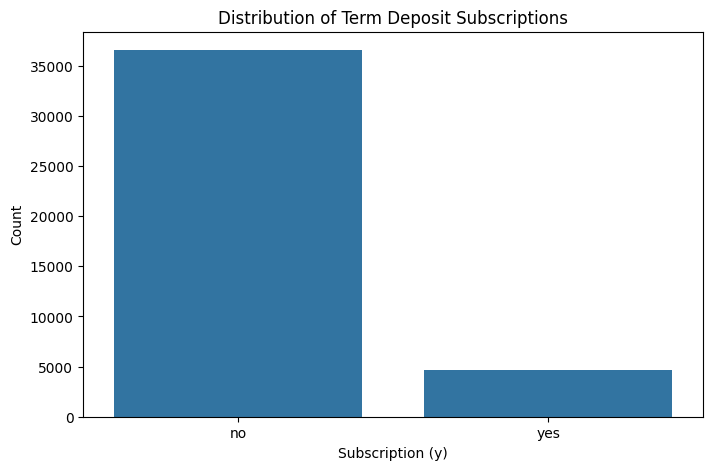


Subscription Distribution (%):
y
no     88.73
yes    11.27
Name: proportion, dtype: float64


In [8]:
# First, examine the target variable ('y') distribution since this is a classification problem:


# Plot target variable distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=Bank_raw_dataset, x='y')
plt.title('Distribution of Term Deposit Subscriptions')
plt.xlabel('Subscription (y)')
plt.ylabel('Count')
plt.show()

# Get percentage distribution
subscription_dist = (Bank_raw_dataset['y'].value_counts(normalize=True) * 100).round(2)
print("\nSubscription Distribution (%):")
print(subscription_dist)

In [9]:
def plot_class_distributions(df, target='y', n_cols=3, figsize=(20, 30)):
    """
    Plots class distributions for all features in the dataset.
    
    Parameters:
    - df: DataFrame containing the data
    - target: Name of the target column (default='y')
    - n_cols: Number of columns in subplot grid
    - figsize: Figure size
    """
    # Separate features from target
    features = [col for col in df.columns if col != target]
    
    # Split features into numerical and categorical
    numerical_features = df[features].select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_features = df[features].select_dtypes(include=['object', 'category']).columns.tolist()
    
    # Create subplot grid
    n_rows = (len(features) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()
    
    # Counter for subplots
    plot_idx = 0
    
    # Plot numerical features
    for col in numerical_features:
        ax = axes[plot_idx]
        
        # Bin numerical data for better visualization
        sns.histplot(data=df, x=col, hue=target, bins=15, 
                    kde=True, ax=ax, palette='viridis',
                    element='step', stat='density', common_norm=False)
        ax.set_title(f'{col} Distribution by Class')
        ax.set_xlabel(col)
        ax.set_ylabel('Density')
        plot_idx += 1
    
    # Plot categorical features
    for col in categorical_features:
        ax = axes[plot_idx]
        
        # Calculate proportions for better comparison
        prop_df = (df.groupby(col)[target]
                  .value_counts(normalize=True)
                  .rename('proportion')
                  .reset_index())
        
        sns.barplot(data=prop_df, x=col, y='proportion', 
                   hue=target, ax=ax, palette='viridis')
        ax.set_title(f'{col} Class Proportions')
        ax.set_xlabel(col)
        ax.set_ylabel('Proportion')
        ax.tick_params(axis='x', rotation=45)
        plot_idx += 1
    
    # Hide empty subplots
    for idx in range(plot_idx, len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()


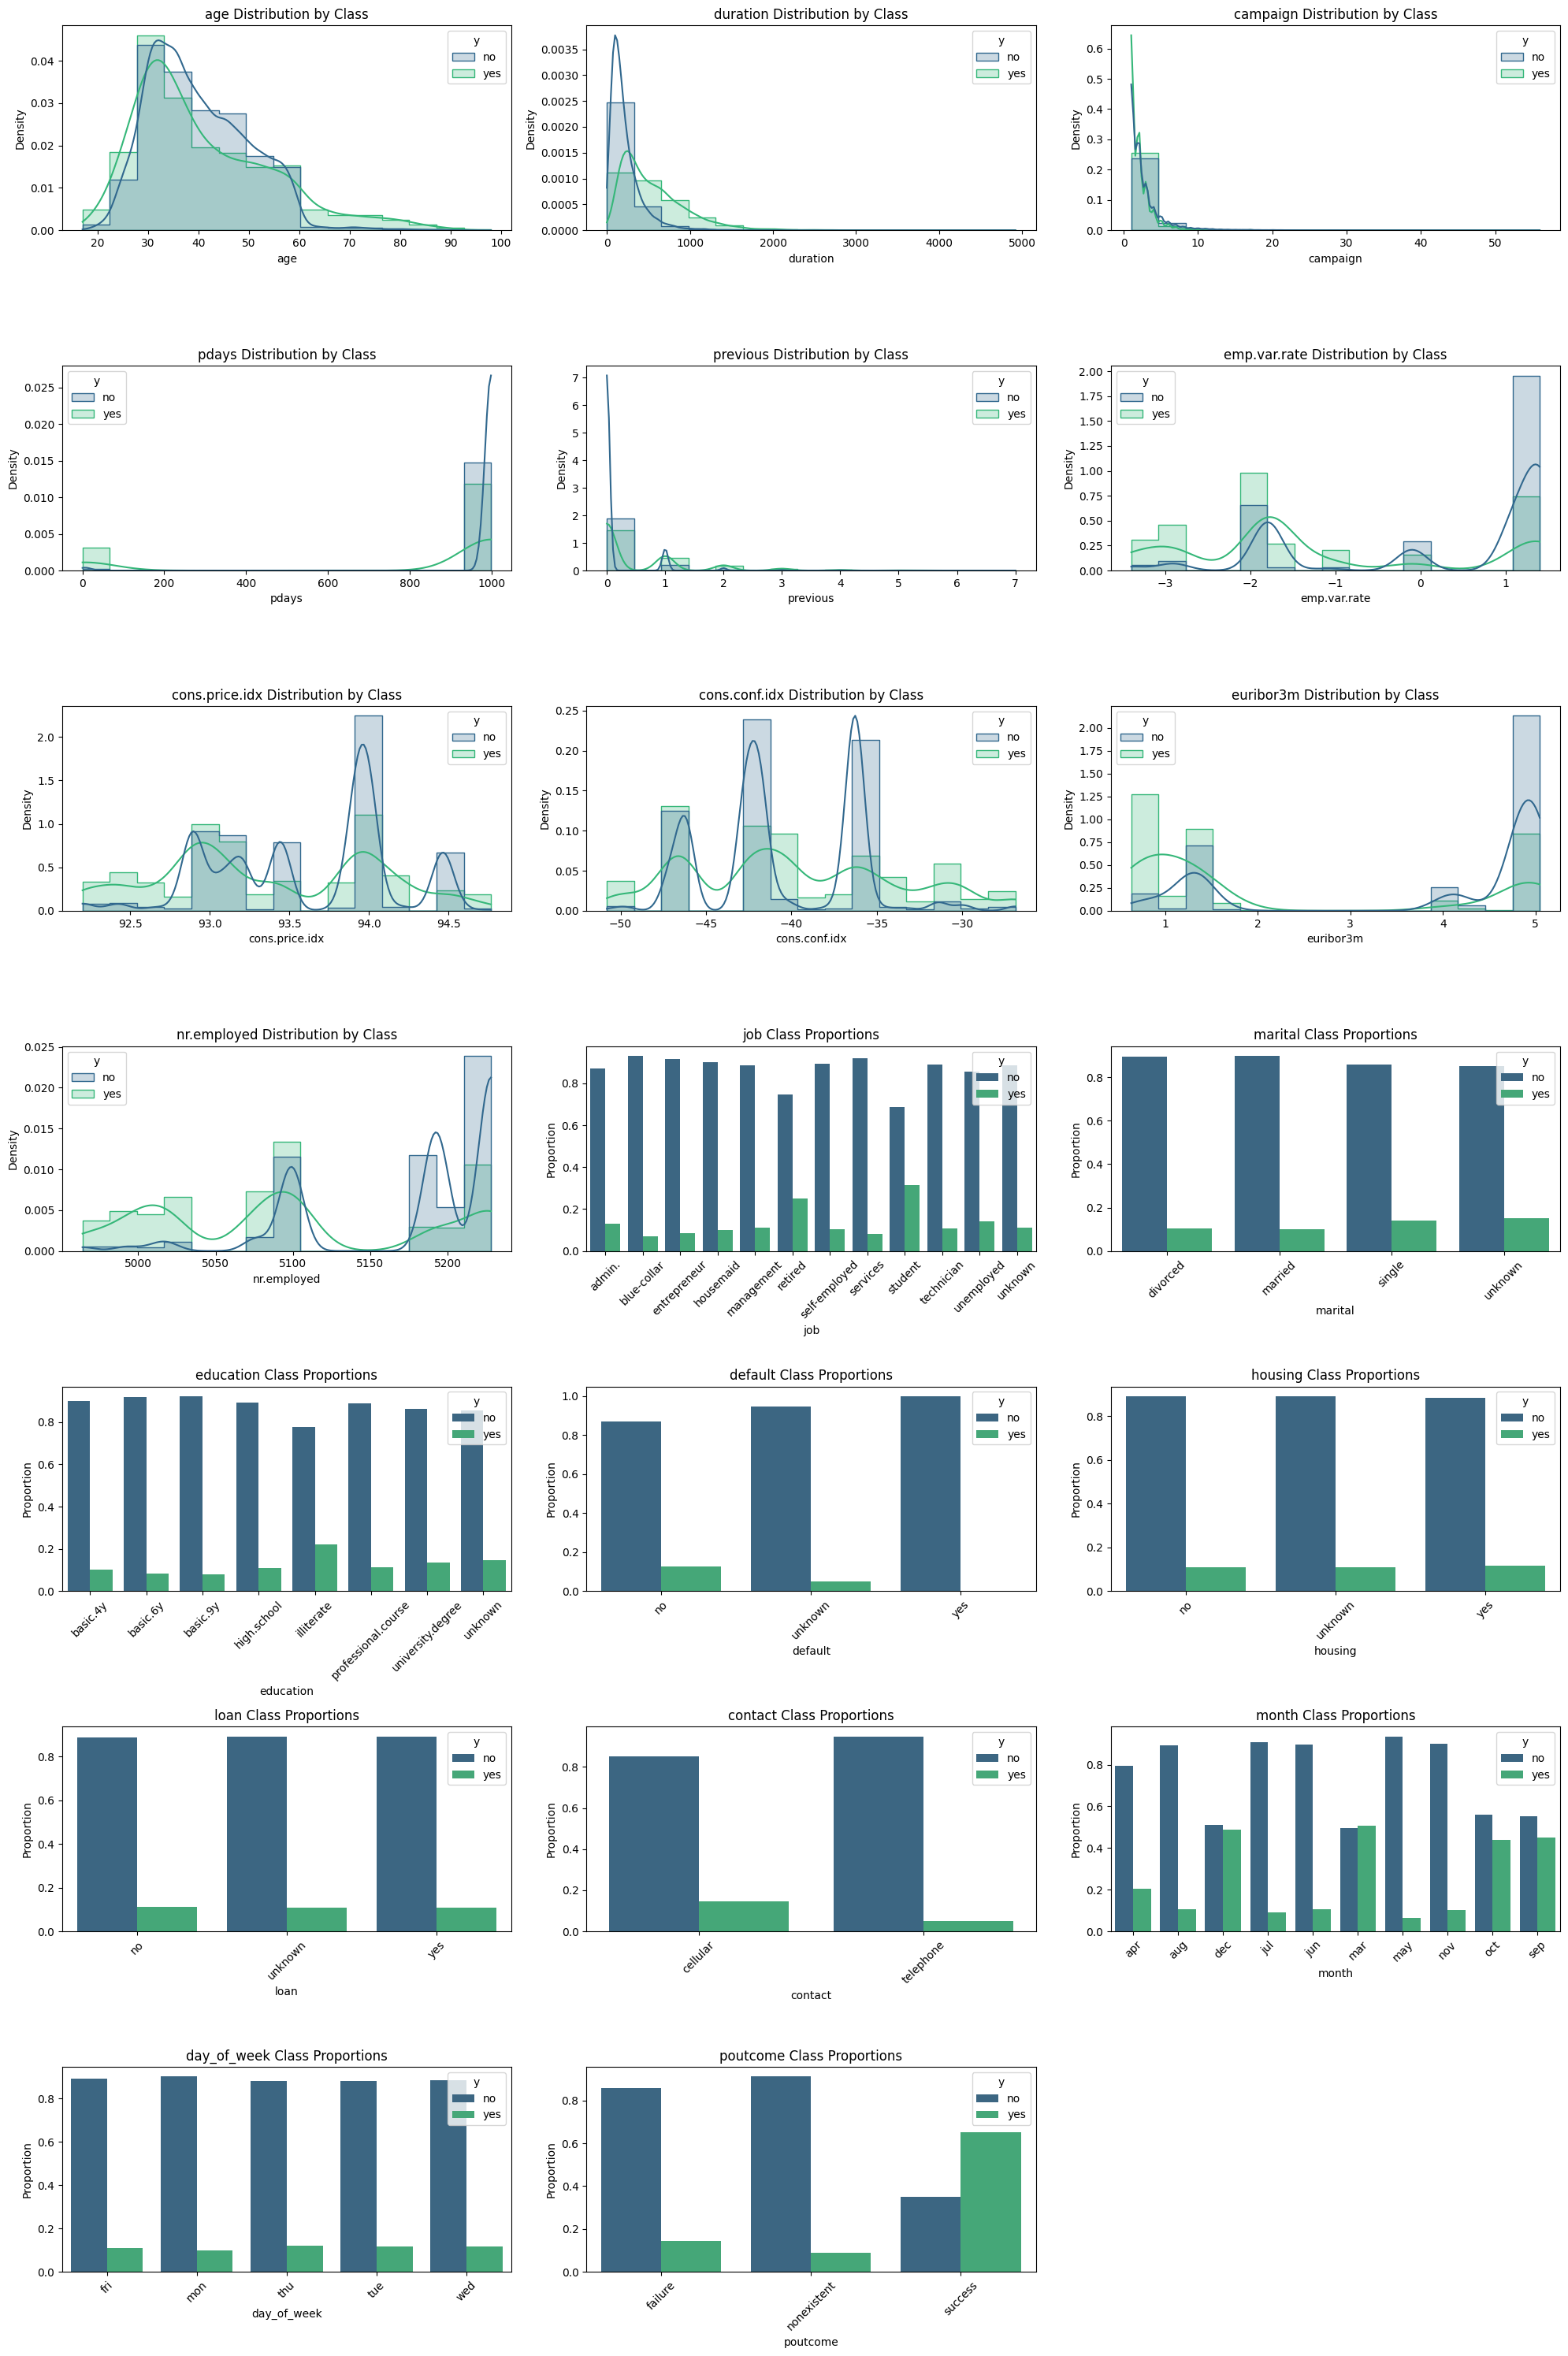

In [10]:
plot_class_distributions(Bank_raw_dataset)

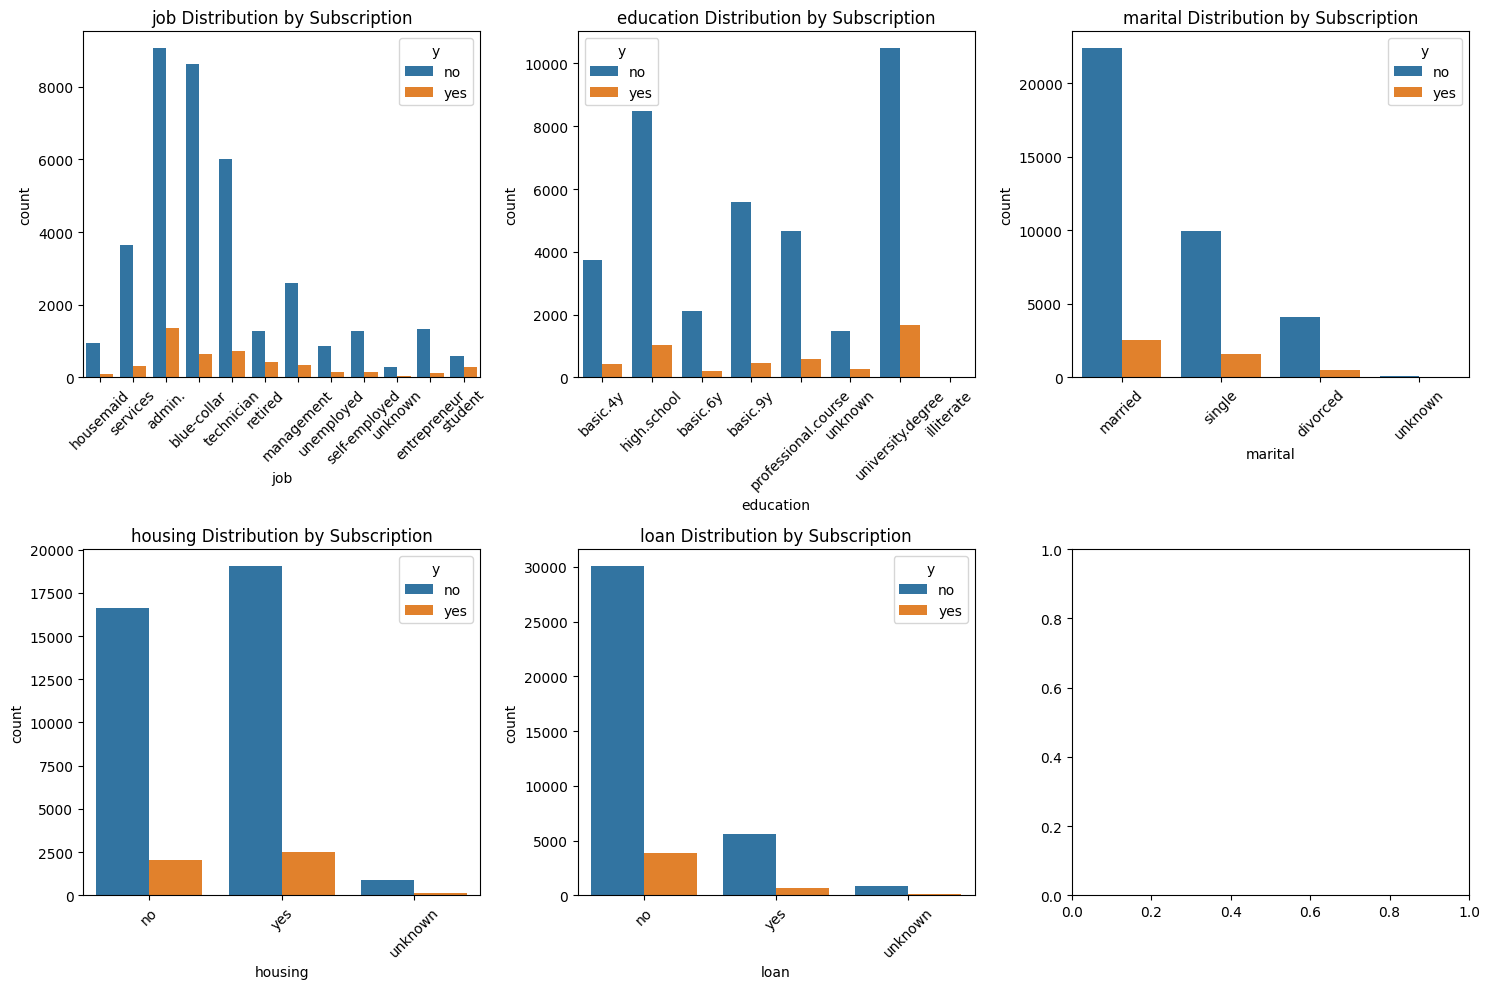

In [11]:
# Then, analyze key categorical features' distribution with respect to the target:

# Key categorical features to analyze
cat_features = ['job', 'education', 'marital', 'housing', 'loan']

# Create subplots for each categorical feature
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(cat_features):
    if idx < len(axes):
        sns.countplot(data=Bank_raw_dataset, x=col, hue='y', ax=axes[idx])
        axes[idx].set_title(f'{col} Distribution by Subscription')
        axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

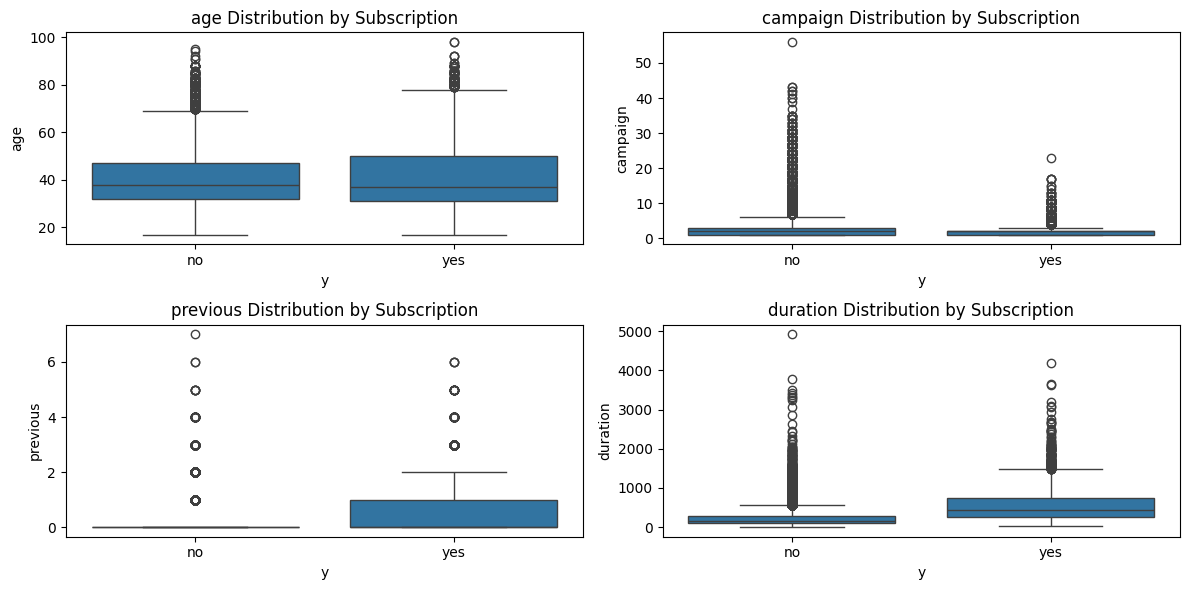

In [12]:
# For numerical features, examine distributions using box plots:

# Key numerical features
num_features = ['age', 'campaign', 'previous', 'duration']

# Create box plots
plt.figure(figsize=(12, 6))
for idx, col in enumerate(num_features):
    plt.subplot(2, 2, idx+1)
    sns.boxplot(data=Bank_raw_dataset, x='y', y=col)
    plt.title(f'{col} Distribution by Subscription')

plt.tight_layout()
plt.show()

In [13]:
from scipy.stats import chi2_contingency

# For categorical features
for cat_feature in ['job', 'marital', 'education', 'housing', 'loan']:
    # Chi-square test for independence
    contingency = pd.crosstab(Bank_raw_dataset[cat_feature], Bank_raw_dataset['y'])
    chi2, p_value, _, _ = chi2_contingency(contingency)
    print(f"\nChi-square test for {cat_feature}:")
    print(f"p-value: {p_value:.10f}")


Chi-square test for job:
p-value: 0.0000000000

Chi-square test for marital:
p-value: 0.0000000000

Chi-square test for education:
p-value: 0.0000000000

Chi-square test for housing:
p-value: 0.0582944767

Chi-square test for loan:
p-value: 0.5786752870


In [14]:
from scipy.stats import pointbiserialr
# For numerical features
numerical_features = ['age', 'duration', 'campaign', 'previous', 'emp.var.rate', 
                     'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Calculate point biserial correlation
def point_biserial_corr(data, numeric_cols, binary_col):
    correlations = {}
    for col in numeric_cols:
        corr = pointbiserialr(data[col], (data[binary_col] == 'yes').astype(int))
        correlations[col] = {'correlation': corr[0], 'p_value': corr[1]}
    return pd.DataFrame(correlations).T

correlations = point_biserial_corr(Bank_raw_dataset, numerical_features, 'y')
print("\nPoint Biserial Correlations with Target:")
print(correlations.sort_values('correlation', ascending=False))


Point Biserial Correlations with Target:
                correlation        p_value
duration           0.405274   0.000000e+00
previous           0.230181   0.000000e+00
cons.conf.idx      0.054878   7.536665e-29
age                0.030399   6.802136e-10
campaign          -0.066357   2.007780e-41
cons.price.idx    -0.136211  9.318965e-170
emp.var.rate      -0.298334   0.000000e+00
euribor3m         -0.307771   0.000000e+00
nr.employed       -0.354536   0.000000e+00


In [15]:
# Calculate class weights
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Extract the target variable
y = Bank_raw_dataset['y']

# Get unique classes as a numpy array
classes = np.unique(y)

# Compute class weights
class_weights = compute_class_weight('balanced', classes=classes, y=y)

# Create a dictionary mapping class labels to their weights
weight_dict = dict(zip(classes, class_weights))

print("\nClass weights for balancing:")
print(weight_dict)


Class weights for balancing:
{'no': np.float64(0.5634781656999015), 'yes': np.float64(4.438362068965517)}


# Interpretition EDA
## Class Imbalance:
- Subscription Distribution:

    - The target variable "y" (subscription) is highly imbalanced, with a majority of instances labeled "no" (88.73%) and only 11.27% labeled "yes." This indicates that the dataset suffers from class imbalance, which may impact the model's performance if not handled properly. Techniques such as oversampling, undersampling, or using class weights can help mitigate this issue.

- Chi-Square Tests:
    -The Chi-square tests are used to measure the dependence between categorical variables and the target variable "y". The p-values below indicate significant relationships with "y":

    - Job: p-value = 0.0000000000 – There is a highly significant relationship between the "job" feature and subscription status. Keep this feature.

    - Marital: p-value = 0.0000000000 – There is a significant relationship between "marital" status and subscription status. Keep this feature.

    - Education: p-value = 0.0000000000 – There is a significant relationship between "education" level and subscription status. Keep this feature.
 
    - Housing: p-value = 0.0582944767 – There is a marginally significant relationship between "housing" status and subscription status (just above the typical threshold of 0.05). This feature could be kept, but the relationship is weaker.
 
    - Loan: p-value = 0.5786752870 – This p-value is higher than 0.05, suggesting no significant relationship between "loan" status and subscription. You may consider removing this feature from the model.

- Point-Biserial Correlation with Target:
    - The Point-Biserial correlation measures the relationship between continuous features and the binary target variable.

- Positive Correlations:

    - Duration (0.405274): A strong positive correlation with the target, meaning longer duration calls are associated with a higher likelihood of subscription. This is a crucial feature and should be kept.

- Previous (0.230181): A moderate positive correlation, implying the number of previous contacts has some predictive power for subscription status. This should also be kept.

Other features (cons.conf.idx, age, cons.price.idx, etc.): These features show varying degrees of correlation with the target and should be retained unless a specific reason exists for removal.

- Class Weights for Balancing:
    - The class weight for the "no" class is 0.5635, and for the "yes" class, it is 4.4384. This shows a much higher weight assigned to the minority class ("yes"), which is consistent with the class imbalance and suggests that when training, the model should give more importance to the "yes" class.

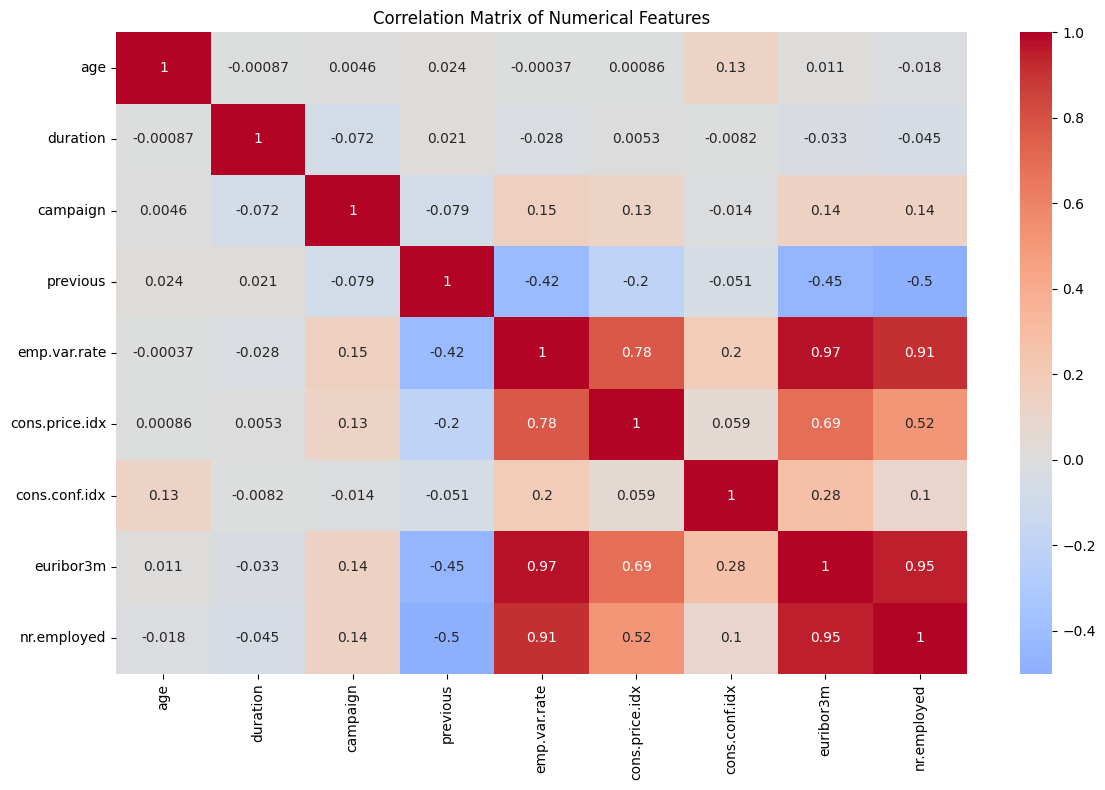

In [16]:
# Check correlation between numerical features
# Numerical features correlation matrix
numerical_features = ['age', 'duration', 'campaign', 'previous', 'emp.var.rate', 
                     'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Create correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = Bank_raw_dataset[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()



In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select only numerical columns for VIF calculation
numerical_features = ['age', 'duration', 'campaign', 'previous', 'cons.price.idx', 
                     'cons.conf.idx', 'nr.employed']

# Create DataFrame with only numerical features
X_numeric = Bank_raw_dataset[numerical_features]

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(X_numeric.values, i) for i in range(X_numeric.shape[1])]

# Display VIF values sorted in descending order
print(vif_data.sort_values("VIF", ascending=False))

          Feature          VIF
4  cons.price.idx  9479.676390
6     nr.employed  9203.647925
5   cons.conf.idx    78.910669
0             age    16.026365
1        duration     2.007853
2        campaign     1.892791
3        previous     1.460211


In [18]:
# Find highly correlated feature pairs
highly_correlated = []
for i in range(len(numerical_features)):
    for j in range(i+1, len(numerical_features)):
        if abs(correlation_matrix.iloc[i,j]) > 0.7:
            highly_correlated.append(
                (numerical_features[i], 
                 numerical_features[j], 
                 correlation_matrix.iloc[i,j])
            )

print("\nHighly correlated features (>0.7):")
for feat1, feat2, corr in highly_correlated:
    print(f"{feat1} - {feat2}: {corr:.3f}")


Highly correlated features (>0.7):
cons.price.idx - cons.conf.idx: 0.775


### Interpretation of Correlations
- Strong Correlations Found (>0.7):

- emp.var.rate (employment variation rate) is highly correlated with:
    - cons.price.idx (0.775)
    - euribor3m (0.972)
    - nr.employed (0.907)
    - euribor3m and nr.employed are also highly correlated (0.946)
- What This Means:

    - These features likely capture similar information
    - Including all of them could lead to multicollinearity issues
    - May negatively impact model performance and interpretability

In [19]:
# Remove highly correlated features
features_to_drop = ['emp.var.rate', 'euribor3m']
selected_features = [col for col in numerical_features if col not in features_to_drop]
categorical_features = ['month', 'job', 'marital', 'education', 'housing', 'loan', 'contact', 'poutcome']

# Create new dataframe with selected features
Bank_dataset_selected = Bank_raw_dataset[selected_features + categorical_features+  ['y']]

print("Selected numerical features:")
print(selected_features)

Selected numerical features:
['age', 'duration', 'campaign', 'previous', 'cons.price.idx', 'cons.conf.idx', 'nr.employed']


In [20]:
# Check if your feature removal resolved the multicollinearity
remaining_features = [col for col in numerical_features if col not in features_to_drop]
X_numeric_reduced = Bank_dataset_selected[remaining_features]

# Recalculate VIF
vif_data_new = pd.DataFrame()
vif_data_new["Feature"] = X_numeric_reduced.columns
vif_data_new["VIF"] = [variance_inflation_factor(X_numeric_reduced.values, i) 
                       for i in range(X_numeric_reduced.shape[1])]
print(vif_data_new.sort_values("VIF", ascending=False))

          Feature          VIF
4  cons.price.idx  9479.676390
6     nr.employed  9203.647925
5   cons.conf.idx    78.910669
0             age    16.026365
1        duration     2.007853
2        campaign     1.892791
3        previous     1.460211


# Outliers Detection

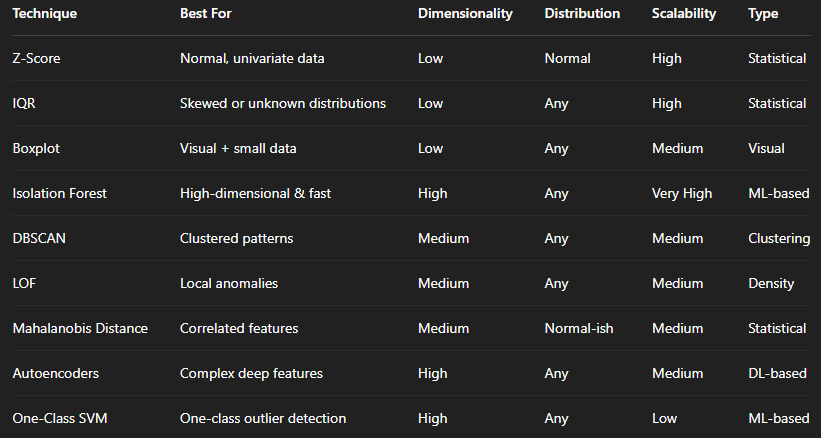

## Question to address: 
1. Techniques of outliers.
2. Are outliers only limited to numerical data.
3. How to detect outliers according to Data types. 

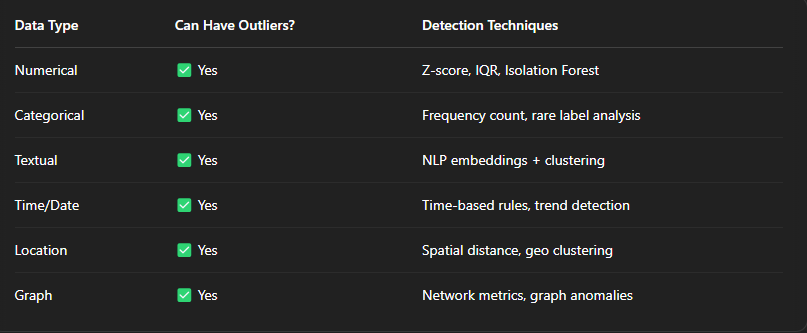

1. Categorical Variable Encoding:
- job, marital, education, default, housing, loan, contact, month, poutcome a) One-Hot Encoding for nominal categories b) Label Encoding for ordinal categories (like education) c) Target Encoding for high cardinality features
2. Numeric Variable Transformations:
- age, balance, duration, campaign, pdays, previous a) Standardization/Normalization b) Log transformation for skewed distributions c) Binning age into groups d) Create age-related features (young, middle-aged, senior)
3. Date/Time Features:
- month a) Convert to cyclical features using sine/cosine transformations b) Create season categories (Spring, Summer, Fall, Winter) c) Create binary flags for holiday months
4. Interaction Features: 
- a) age × job b) balance × loan c) duration × previous_contact d) campaign × previous e) housing × loan

5. Aggregated Features: 
- a) Average balance by job category b) Contact rate by age group c) Success rate by education level d) Campaign frequency by month

6. Feature Ratios: 
- a) balance_to_loan_ratio b) campaign_to_previous_ratio c) age_to_balance_ratio

In [21]:
from scipy import stats
def detect_outliers(df, features):
    """
    Detect outliers using multiple methods and return summary
    """
    outlier_summary = {}
    
    for feature in features:
        # Calculate IQR
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Calculate Z-score
        z_scores = np.abs(stats.zscore(df[feature]))
        
        outlier_summary[feature] = {
            'IQR_outliers': len(df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]),
            'IQR_percentage': len(df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]) / len(df) * 100,
            'Z_score_outliers': len(df[z_scores > 3]),
            'Z_score_percentage': len(df[z_scores > 3]) / len(df) * 100,
            'min': df[feature].min(),
            'max': df[feature].max(),
            'mean': df[feature].mean(),
            'median': df[feature].median()
        }
    
    return pd.DataFrame(outlier_summary).T


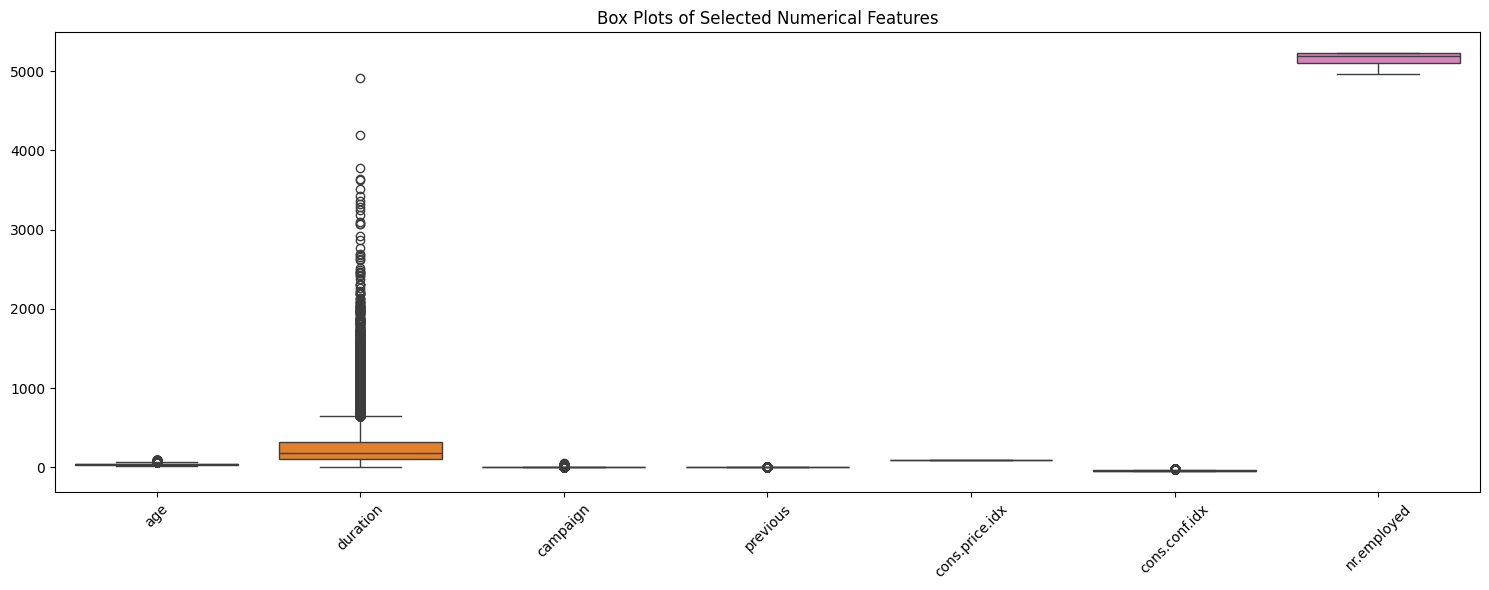

In [22]:
# Analyze outliers in selected numerical features
selected_num_features = ['age', 'duration', 'campaign', 'previous', 
                        'cons.price.idx', 'cons.conf.idx', 'nr.employed']

# Create box plots for visual inspection
plt.figure(figsize=(15, 6))
sns.boxplot(data=Bank_dataset_selected[selected_num_features])
plt.xticks(rotation=45)
plt.title('Box Plots of Selected Numerical Features')
plt.tight_layout()
plt.show()


In [23]:
# Get detailed outlier summary
outlier_summary = detect_outliers(Bank_dataset_selected, selected_num_features)
print("\nOutlier Detection Summary:")
print(outlier_summary.round(2))



Outlier Detection Summary:
                IQR_outliers  IQR_percentage  Z_score_outliers  \
age                    469.0            1.14             369.0   
duration              2963.0            7.19             861.0   
campaign              2406.0            5.84             869.0   
previous              5625.0           13.66            1064.0   
cons.price.idx           0.0            0.00               0.0   
cons.conf.idx          447.0            1.09               0.0   
nr.employed              0.0            0.00               0.0   

                Z_score_percentage     min      max     mean   median  
age                           0.90    17.0    98.00    40.02    38.00  
duration                      2.09     0.0  4918.00   258.29   180.00  
campaign                      2.11     1.0    56.00     2.57     2.00  
previous                      2.58     0.0     7.00     0.17     0.00  
cons.price.idx                0.00    92.2    94.77    93.58    93.75  
cons.conf.i

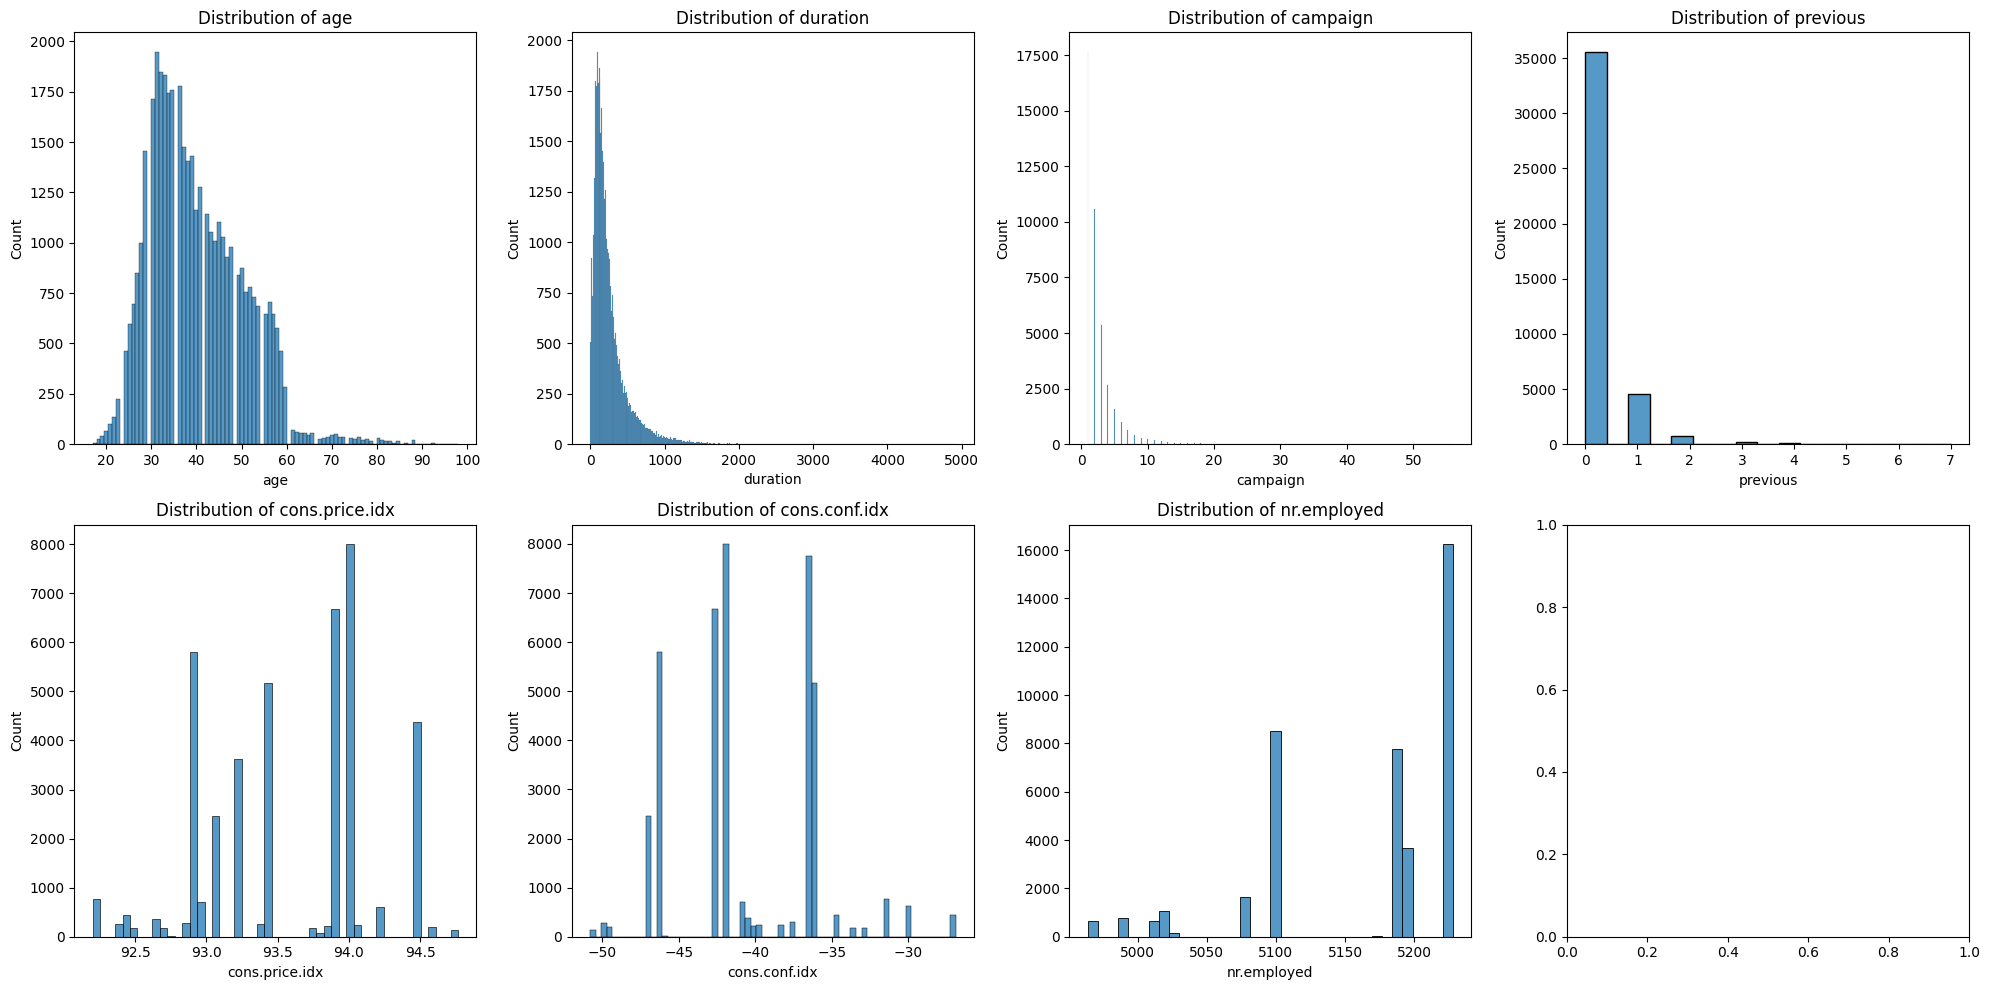

In [24]:
# Plot distribution of each feature
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for idx, feature in enumerate(selected_num_features):
    sns.histplot(data=Bank_dataset_selected, x=feature, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

# Interpretation of Outlier Detection Results

Analyzing the outliers for each feature:

### 1\. Age

-   Moderate number of outliers (1.14% by IQR, 0.90% by Z-score)
-   Range: 17-98 years
-   Mean (40.02) close to median (38.00), suggesting relatively symmetric distribution
-   **Recommendation**: Keep outliers as they represent valid age groups

### 2\. Duration

-   Significant outliers (7.19% by IQR, 2.09% by Z-score)
-   Large range: 0-4918 seconds
-   Mean (258.29) much higher than median (180.00), indicating right skew
-   **Recommendation**: Consider log transformation or capping at 95th percentile

### 3\. Campaign

-   Moderate outliers (5.84% by IQR, 2.11% by Z-score)
-   Range: 1-56 contacts
-   Mean (2.57) close to median (2.00)
-   **Recommendation**: Cap extreme values or bin into categories

### 4\. Previous

-   Highest percentage of outliers (13.66% by IQR, 2.58% by Z-score)
-   Range: 0-7 previous contacts
-   Strong right skew (mean 0.17, median 0.00)
-   **Recommendation**: Consider binary encoding (had previous contact or not)

### 5\. Economic Indicators (cons.price.idx, cons.conf.idx, nr.employed)

-   Almost no outliers by either method
-   Tight distributions around their means
-   **Recommendation**: Keep as is, no treatment needed

## Should we handle outliers 
- Call Duration (0-4918s): Long calls (up to 82 minutes) are valid business interactions and strongly correlate with successful conversions. Rather than treating these as outliers, they represent meaningful customer engagement patterns.

- Campaign & Previous Contacts: Multiple contacts (1-56) and previous campaign interactions (0-7) reflect legitimate sales strategies and customer relationship history. These values capture important information about customer responsiveness and potential.

- Alternative Approach: Instead of outlier treatment, consider creating meaningful derived features:

    - Duration bins (short/medium/long calls)
    - Contact intensity levels (low/medium/high)
    - Previous contact categories (none/some/frequent)

# 2. Feature Engineering

In [25]:
# Import required libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1. Create Duration Bins
def create_duration_bins(df):
    df['duration_category'] = pd.qcut(df['duration'], q=3, labels=['short', 'medium', 'long'])
    return df

# 2. Create Age Groups
def create_age_groups(df):
    bins = [0, 25, 35, 50, 100]
    labels = ['young', 'young_adult', 'middle_aged', 'senior']
    df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)
    return df

# 3. Create Campaign Intensity
def create_campaign_features(df):
    """
    Create campaign-related features with custom bins to handle duplicates
    """
    # Create custom bins for campaign
    campaign_bins = [0, 2, 5, float('inf')]  # Based on data distribution
    campaign_labels = ['low', 'medium', 'high']
    
    df['campaign_intensity'] = pd.cut(df['campaign'], 
                                    bins=campaign_bins, 
                                    labels=campaign_labels,
                                    include_lowest=True)
    
    df['had_previous_contact'] = (df['previous'] > 0).astype(int)
    return df

# 4. Season from Month
def create_season_features(df):
    season_map = {
        'mar': 'spring', 'apr': 'spring', 'may': 'spring',
        'jun': 'summer', 'jul': 'summer', 'aug': 'summer',
        'sep': 'autumn', 'oct': 'autumn', 'nov': 'autumn',
        'dec': 'winter', 'jan': 'winter', 'feb': 'winter'
    }
    df['season'] = df['month'].map(season_map)
    return df


In [26]:
Bank_dataset_engineered = Bank_dataset_selected.copy()
Bank_dataset_engineered = create_duration_bins(Bank_dataset_engineered)
Bank_dataset_engineered = create_age_groups(Bank_dataset_engineered)
Bank_dataset_engineered = create_campaign_features(Bank_dataset_engineered)
Bank_dataset_engineered = create_season_features(Bank_dataset_engineered)

# Print sample and distribution of new features
print("\nSample of engineered features:")
print(Bank_dataset_engineered[['duration_category', 'age_group', 
                             'campaign_intensity', 'had_previous_contact']].head())



Sample of engineered features:
  duration_category    age_group campaign_intensity  had_previous_contact
0              long       senior                low                     0
1            medium       senior                low                     0
2            medium  middle_aged                low                     0
3            medium  middle_aged                low                     0
4              long       senior                low                     0


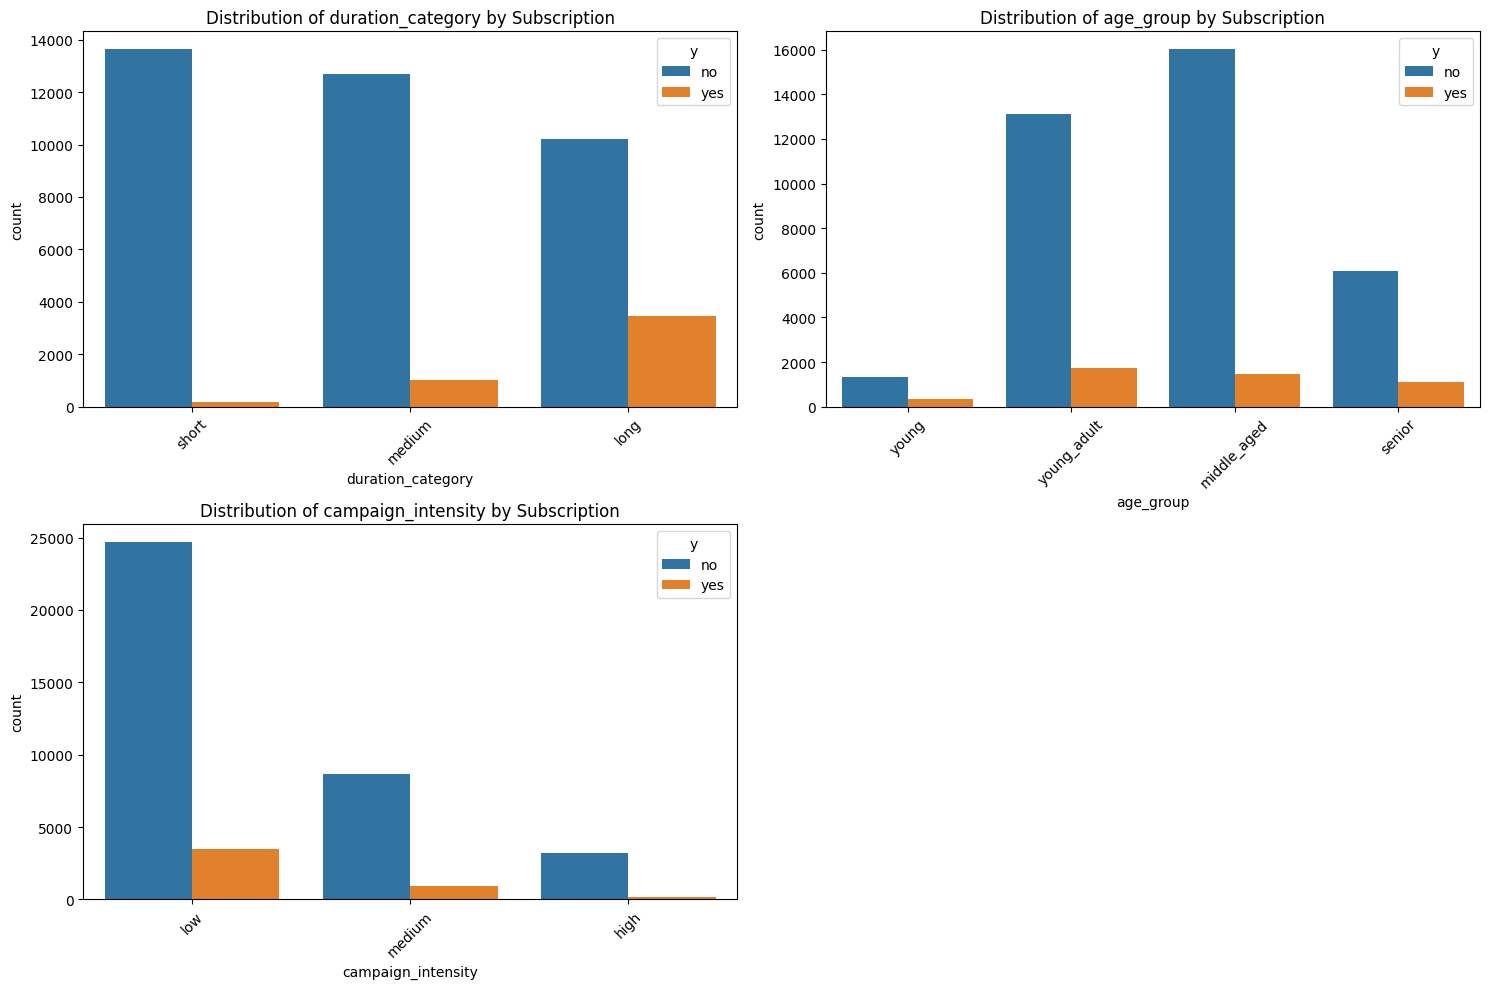

In [27]:
# Visualize new feature distributions
plt.figure(figsize=(15, 10))
for idx, col in enumerate(['duration_category', 'age_group', 'campaign_intensity']):
    plt.subplot(2, 2, idx+1)
    sns.countplot(data=Bank_dataset_engineered, x=col, hue='y')
    plt.title(f'Distribution of {col} by Subscription')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2.1 Encoding the dataset  

In [28]:
# Import required libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [29]:
def encode_all_categorical_features(df):
    """
    Encode all categorical variables and ensure no string values remain
    """
    df_encoded = df.copy()
    
    # First handle the target variable
    target = df_encoded['y']
    df_encoded = df_encoded.drop('y', axis=1)
    
    # 1. Handle categorical features that were created during feature engineering
    categorical_features = [
        'duration_category', 'age_group', 'campaign_intensity',
        'season', 'month', 'job', 'marital', 'education',
        'housing', 'loan', 'contact', 'poutcome'
    ]
    
    # 2. Convert all categorical features to category dtype
    for col in categorical_features:
        if col in df_encoded.columns:
            df_encoded[col] = df_encoded[col].astype('category')
    
    # 3. Handle education separately as ordinal
    if 'education' in df_encoded.columns:
        education_order = ['primary', 'secondary', 'tertiary', 'unknown']
        df_encoded['education'] = pd.Categorical(
            df_encoded['education'],
            categories=education_order,
            ordered=True
        )
    
    # 4. Get all categorical columns currently in the dataframe
    categorical_columns = df_encoded.select_dtypes(include=['category', 'object']).columns
    
    # 5. One-hot encoding for all categorical variables
    df_encoded = pd.get_dummies(
        df_encoded,
        columns=categorical_columns,
        prefix=categorical_columns,
        drop_first=True
    )
    
    # 6. Convert all remaining columns to float32
    for col in df_encoded.columns:
        df_encoded[col] = df_encoded[col].astype('float32')
    
    return df_encoded, target

# Apply encoding
X, y = encode_all_categorical_features(Bank_dataset_engineered)

# Scale numerical features
numerical_cols = ['age', 'duration', 'campaign', 'previous', 
                 'cons.price.idx', 'cons.conf.idx', 'nr.employed']
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Convert target to numeric
y = (y == 'yes').astype('float32')

# Verify data types
print("\nFeature types in X:")
print(X.dtypes.value_counts())
print("\nTarget type:", y.dtype)




Feature types in X:
float32    51
Name: count, dtype: int64

Target type: float32


Create Train-Test Split with Stratification


# 2.3 Handeling class imbalance 

In [30]:
from sklearn.model_selection import train_test_split

# Create stratified train-test split to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42,
    stratify=y
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (28831, 51)
Testing set shape: (12357, 51)


Handle Class Imbalance

In [31]:
import joblib
import os

# Create processed data directory if it doesn't exist
processed_data_dir = '../data/processed'
os.makedirs(processed_data_dir, exist_ok=True)

# Save processed features, target, and scaler
joblib.dump(X, f'{processed_data_dir}/X_processed.joblib')
joblib.dump(y, f'{processed_data_dir}/y_processed.joblib')
joblib.dump(scaler, f'{processed_data_dir}/scaler.joblib')


print("Saved processed data to:", processed_data_dir)

Saved processed data to: ../data/processed


### Benefits of Using joblib for Saving Processed Data:

1.  **Performance**
    
    -   Faster than pickle for large NumPy arrays
    -   Optimized for scientific Python objects
    -   Efficient handling of large datasets
2.  **Consistency**
    
    -   Maintains data types and scaling parameters
    -   Preserves the exact state of preprocessed features
    -   Ensures reproducibility across different sessions
3.  **Workflow Efficiency**
    
    -   Avoids repeating time-consuming preprocessing steps
    -   Allows quick model experimentation
    -   Easy to share processed data between notebooks
4.  **Memory Management**
    
    -   Uses disk memory instead of RAM for large objects
    -   Provides memory-efficient storage
    -   Supports compressed storage formats
5.  **Pipeline Integration**
    
    -   Seamlessly works with scikit-learn pipelines
    -   Maintains preprocessing transformations
    -   Preserves feature names and order